# Part 1: Basic Option Valuation
Carry out convergence studies by increasing the number of trials.  <br>
How do your results compare with the results obtained in assignment 1?  <br>
Perform numerical tests for varying values for the strike and the volatility parameter.  <br>
What is the standard error of your estimate and what does this tell you about the accuracy?

# TO DO 
### Romy:
- Maakt tabellen 2.1 + BS delta berekening
- Overleaf intro schrijven

### Jasper:
- [ ] 1 alle plotjes voor 1
- [ ] 2.2 pathwise controle
- [ ] 3 formules
- [ ] 3 coderen Asian option

### Steven:
- 2.2 sameseed/different seed allebei?
- pathwise bullshit
- Begin bij S0 of S1
- Wat zijn trials in 1.1


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import random

from scipy.stats import norm
from numba import jit
from scipy import stats

In [2]:
# THIS IS NOW A PUT OPTION!

@jit (nopython = True)
def one_step_stock(stock_price, interest_rate, volatility, maturity):
    return stock_price * math.exp((interest_rate - 0.5 * volatility ** 2) * maturity + volatility * math.sqrt(maturity) * np.random.normal())

@jit (nopython = True)
def monte_carlo_option(trials, strike_price, stock_price, interest_rate, volatility, maturity):
    # trials are #iterations of monte carlo
    monte_results = []
    for i in range(trials):
        current_monte = one_step_stock(stock_price, interest_rate, volatility, maturity)
        if current_monte - strike_price < 0:
            monte_results.append((strike_price - current_monte) * math.exp(-interest_rate))
        else:
            monte_results.append(0)
        
    return monte_results 
    

In [3]:
@jit (nopython = True)
def experiment(trials = 1000, K = 99, sigma = 0.2):
    ''' The Monte Carlo method.'''
    T = 1
    r = 0.06
    S0 = 100

    
#     time0 = time.time()

    monte_total = []
    iters = 1000
    for i in range(iters):
        monte_results = monte_carlo_option(trials, K, S0, r, sigma, T)
        # print(time.time() - time0)

        # Mean and std
        monte_mean = np.mean(np.array(monte_results))
        monte_total.append(monte_mean)
    # monte_std = np.std(monte_results)
    return monte_total

In [5]:
results = experiment()

In [6]:
np.mean(results)

4.777374968692875

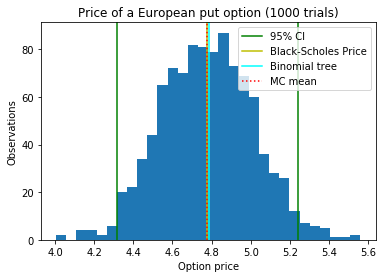

(4.3154025719412035, 5.239347365444547)


In [11]:
trials = 1000
#Payoff kan nooit negatief zijn 
CI95 = stats.norm.interval(0.95, loc = np.mean(results), scale = np.std(results)) 
plt.axvline(CI95[0], color = 'g', label = '95% CI')
plt.axvline(4.779, color = 'y',  label = 'Black-Scholes Price')
plt.axvline(4.7862, color = 'cyan',  label = 'Binomial tree')
plt.axvline(np.mean(results), color = 'r', linestyle = ':', label = 'MC mean')

plt.axvline(CI95[1], color = 'g')

plt.legend()
plt.hist(results, bins = 30)
plt.ylabel('Observations')
plt.xlabel('Option price')
plt.title('Price of a European put option ('+ str(trials) + ' trials)')
plt.savefig(str(trials) + 'trialsQ21Put.png')
plt.show()

print(CI95)

In [13]:
results = []
confint = [[],[]]
for i in [2, 3, 4, 5, 6]:
    print(i)
    result = experiment(trials = 10**i)
    results.append(np.mean(result))
    CI95 = stats.norm.interval(0.95, loc = np.mean(result), scale = np.std(result)) 
    confint[0].append(CI95[0])
    confint[1].append(CI95[1])
print(results, confint)

2
3
4
5


KeyboardInterrupt: 

In [14]:
"""Strike Price changing"""

results = []
confint = [[],[]]
for i in np.arange(80, 120, 0.1):
    print(i)
    result = experiment(K = i)
    results.append(np.mean(result))
    CI95 = stats.norm.interval(0.95, loc = np.mean(result), scale = np.std(result)) 
    confint[0].append(CI95[0])
    confint[1].append(CI95[1])
print(results, confint)

80.0
80.1
80.19999999999999
80.29999999999998
80.39999999999998
80.49999999999997
80.59999999999997
80.69999999999996
80.79999999999995
80.89999999999995
80.99999999999994
81.09999999999994
81.19999999999993
81.29999999999993
81.39999999999992
81.49999999999991
81.59999999999991
81.6999999999999
81.7999999999999
81.89999999999989
81.99999999999989
82.09999999999988
82.19999999999987
82.29999999999987
82.39999999999986
82.49999999999986
82.59999999999985
82.69999999999985
82.79999999999984
82.89999999999984
82.99999999999983
83.09999999999982
83.19999999999982
83.29999999999981
83.3999999999998
83.4999999999998
83.5999999999998
83.69999999999979
83.79999999999978
83.89999999999978
83.99999999999977
84.09999999999977
84.19999999999976
84.29999999999976
84.39999999999975
84.49999999999974
84.59999999999974
84.69999999999973
84.79999999999973
84.89999999999972
84.99999999999972
85.09999999999971
85.1999999999997
85.2999999999997
85.3999999999997
85.49999999999969
85.59999999999968
85.69999

In [ ]:
"""And plotting those strikeprices"""

plt.plot(np.arange(80, 120, 0.1), results, label = "Mean")
plt.plot(np.arange(80, 120, 0.1), confint[0], linestyle = ":", c= "black", label = "Confidence interval 95%")
plt.plot(np.arange(80, 120, 0.1), confint[1], linestyle = ":", c= "black")
plt.plot(np.arange(80, 120, 0.1), [confint[1][i] - confint[0][i] for i in range(len(confint[0]))], c= "black", label = "Width confidence interval")
plt.legend()
plt.xlabel("Strike price")
plt.ylabel("Option price")
plt.title("Price of a European put option for different strike prices")
plt.ylim([0,18])
plt.savefig("strike_price_effect.png")
plt.show()



In [ ]:
"""Strike Price changing"""

results = []
confint = [[],[]]
for i in np.arange(0.001, 0.4, 0.001):
    print(i)
    result = experiment(sigma = i)
    results.append(np.mean(result))
    CI95 = stats.norm.interval(0.95, loc = np.mean(result), scale = np.std(result)) 
    confint[0].append(CI95[0])
    confint[1].append(CI95[1])
print(results, confint)

ValueError: x and y must have same first dimension, but have shapes (399,) and (1000,)

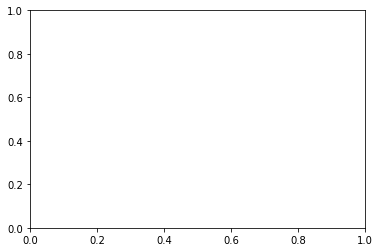

In [12]:
"""And plotting those strikeprices"""

plt.plot(np.arange(0.001, 0.4, 0.001), results, label = "Mean")
plt.plot(np.arange(0.001, 0.4, 0.001), confint[0], linestyle = ":", c= "black", label = "Confidence interval 95%")
plt.plot(np.arange(0.001, 0.4, 0.001), confint[1], linestyle = ":", c= "black")
plt.plot(np.arange(0.001, 0.4, 0.001), [confint[1][i] - confint[0][i] for i in range(len(confint[0]))], c= "black", label = "Width confidence interval")
plt.legend()
plt.xlabel("Volatility")
plt.ylabel("Option price")
plt.title("Price of a European put option for different volatilities")
#plt.ylim([0,18])
plt.savefig("volatilittitties_effect.png")
plt.show()


In [ ]:
plt.plot(np.arange(90, 110, 0.1), [confint[1][i] - confint[0][i] for i in range(len(confint[0]))] , linestyle = ":", c= "black")

plt.show()

In [ ]:
# '''  Varying the strike and the volatility. '''

# strike_list = [x for x in range(1,201)] #np.linspace(1,200)
# # print(strike_list)

# profit_list = []
# for K in strike_list:
#     profit = monte_carlo_option(trials, K, S0, r, sigma, T)
#     profit_list.append(profit)
     
# plt.plot(strike_list, profit)
# plt.title('Varying strike')
# plt.xlabel('Strike price')
# plt.ylabel('Profit or Loss')
# plt.legend()
# plt.show()

# Part 2: Estimation of Sensitivities in MC

## 1) Bump-and-revalue method.

In [21]:
@jit (nopython = True)
def one_step_stock(stock_price, interest_rate, volatility, maturity, Z):
    return stock_price * math.exp((interest_rate - 0.5 * volatility ** 2) * maturity + volatility * math.sqrt(maturity) * Z)

@jit (nopython = True)
def monte_carlo_option(trials, strike_price, stock_price, interest_rate, volatility, maturity, randomness):
    # trials are #iterations of monte carlo
    monte_results = []
    for i in range(trials):
        current_monte = one_step_stock(stock_price, interest_rate, volatility, maturity, randomness[i])
        if strike_price - current_monte > 0:
            monte_results.append((strike_price - current_monte) * math.exp(-interest_rate))
        else:
            monte_results.append(0)
        
    return monte_results 
    

In [49]:
@jit (nopython = True)
def experiment(epsilon, trials, seedlist):
    ''' The Monte Carlo method.'''
    T = 1
    K = 99
    r = 0.06
    S0 = 100 + epsilon
    sigma = 0.2

    monte_total = []
    for i in range(trials):
        np.random.seed(seedlist[i])
        randommess = []
        for _ in range(trials):
            randommess.append(np.random.normal())
        monte_results = monte_carlo_option(trials, K, S0, r, sigma, T, randommess)
        # Mean 
        monte_mean = np.mean(np.array(monte_results))
        monte_total.append(monte_mean)

    return monte_total

In [50]:
""" Approximate delta. """
def euler(epsilon, trials, sameseed):    
    if sameseed == True:
        seedlist = np.random.randint(1000, size = trials)
        
        bumped = np.mean(np.array(experiment(epsilon, trials, seedlist)))
        unbumped = np.mean(np.array(experiment(0, trials, seedlist)))
    else:
        
        seedlist = np.random.randint(1000, size = trials)
        bumped = np.mean(np.array(experiment(epsilon, trials, seedlist)))
        
        seedlist = np.random.randint(1000, size = trials)
        unbumped = np.mean(np.array(experiment(0, trials, seedlist)))
    
    print(unbumped)
    print(bumped)
    delta = (bumped - unbumped) / epsilon
    
    return delta

In [51]:
''' The Analytical Delta. '''
# -0.326265
def analytical_delta(current_stock_price = 100, strike_price = 99, interest_rate = 0.06, volatility = 0.20, T = 1):
    d1 = (math.log(current_stock_price / strike_price) + (interest_rate + (volatility ** 2) / 2) * T) / (volatility * math.sqrt(T))
    return norm.cdf(d1)

In [52]:
""" Relative error in percentage. """
def relative_error(true_value, approx_value):
    return (abs(true_value - approx_value) / true_value) * 100

In [ ]:
""" Compute deltas for different seeds
    with epsilon 0.01, 0.02, 0.5. """

# Size 10^4
number_of_trials = int(1e4)
dif_delta4_1 = euler(1e-2, number_of_trials, False)
dif_delta4_2 = euler(2e-2, trials = number_of_trials, sameseed=False)
dif_delta4_5 = euler(5e-1, trials = number_of_trials, sameseed=False)

# # Size 10^5
number_of_trials = int(1e5)
randommess = np.random.normal(size=number_of_trials)
dif_delta5_1 = euler(1e-2, trials = number_of_trials, sameseed=False)
dif_delta5_2 = euler(2e-2, trials = number_of_trials, sameseed=False)
dif_delta5_5 = euler(5e-1, trials = number_of_trials, sameseed=False)

# Size 10^6
number_of_trials = int(1e6)
randommess = np.random.normal(size=number_of_trials)
dif_delta6_1 = euler(1e-2, trials = number_of_trials, sameseed=False)
dif_delta6_2 = euler(2e-2, trials = number_of_trials, sameseed=False)
dif_delta6_5 = euler(5e-1, trials = number_of_trials, sameseed=False)

# Size 10^7
number_of_trials = int(1e7)
randommess = np.random.normal(size=number_of_trials)
dif_delta7_1 = euler(1e-2, trials = number_of_trials, sameseed=False)
dif_delta7_2 = euler(2e-2, trials = number_of_trials, sameseed=False)
dif_delta7_5 = euler(5e-1, trials = number_of_trials, sameseed=False)

4.779979956541818
4.775447312652786
4.778186418542448
4.7719192682668305
4.77686774597471
4.618165035243042
4.779281014556301
4.776044297148145
4.779515025015541
4.7726872737091295


In [ ]:
# """ Compute deltas for same seed 
#     with epsilon 0.01, 0.02, 0.5. """

# Size 10^4
number_of_trials = int(1e4)
randommess = np.random.normal(size=number_of_trials)
same_delta4_1 = euler(1e-2, trials = number_of_trials, sameseed=True)
same_delta4_2 = euler(2e-2, trials = number_of_trials, sameseed=True)
same_delta4_5 = euler(5e-1, trials = number_of_trials, sameseed=True)

# # Size 10^5
# number_of_trials = int(1e5)
# randommess = np.random.normal(size=number_of_trials)
# same_delta5_1 = euler(1e-2, trials = number_of_trials, sameseed=True)
# same_delta5_2 = euler(2e-2, trials = number_of_trials, sameseed=True)
# same_delta5_5 = euler(5e-1, trials = number_of_trials, sameseed=True)

# # Size 10^6
# number_of_trials = int(1e6)
# randommess = np.random.normal(size=number_of_trials)
# same_delta6_1 = euler(1e-2, trials = number_of_trials, sameseed=True)
# same_delta6_2 = euler(2e-2, trials = number_of_trials, sameseed=True)
# same_delta6_5 = euler(5e-1, trials = number_of_trials, sameseed=True)

# # Size 10^7
# number_of_trials = int(1e7)
# randommess = np.random.normal(size=number_of_trials)
# same_delta7_1 = euler(1e-2, trials = number_of_trials, sameseed=True)
# same_delta7_2 = euler(2e-2, trials = number_of_trials, sameseed=True)
# same_delta7_5 = euler(5e-1, trials = number_of_trials, sameseed=True)

In [31]:
""" Relative error is shown with analytical value as reference. """

print(dif_delta4_1)
print(-0.326265)
print(analytical_delta() -1)

-0.40259503723056866
-0.326265
-0.3262644882651039


In [ ]:
for dif_delta in [dif_delta4_1, dif_delta4_2, dif_delta4_5, dif_delta5_1, dif_delta5_2, dif_delta5_5, dif_delta6_1, dif_delta6_2, dif_delta6_5, dif_delta7_1, dif_delta7_2, dif_delta7_5]:
    print(relative_error(analytical_delta, dif_delta))

## 2)  Digital option

In [ ]:
import scipy

In [ ]:
def experiment2(epsilon, trials, seedlist):
    ''' The Monte Carlo method.'''
    T = 1
    K = 99
    S0 = 100 + epsilon
    sigma = 0.2
    r = 0.06

    monte_total = []
    for i in range(trials):
        np.random.seed(seedlist[i])
        randommess = np.random.normal(size = trials)
        monte_results = digital_option(trials, K, S0, r, sigma, T, randommess)

        monte_mean = np.mean(monte_results)
        monte_total.append(monte_mean)

    return monte_total

@jit (nopython = True)
def digital_option(trials, strike_price, stock_price, interest_rate, volatility, maturity, randomness):
    # trials are #iterations of monte carlo
    monte_results = []

    for i in range(trials):
        current_monte = one_step_stock(stock_price, interest_rate, volatility, maturity, randomness[i])
        if current_monte - strike_price > 0:
            
            monte_results.append(1 * math.exp(-interest_rate))
        else:
            monte_results.append(0)

    return monte_results

@jit (nopython = True)
def one_step_stock(stock_price, interest_rate, volatility, maturity, Z):
    return stock_price * math.exp((interest_rate - 0.5 * volatility ** 2) * maturity + volatility * math.sqrt(maturity) * Z)

In [ ]:
trials = 1000
digital_value = experiment2(0.0, trials, np.random.randint(1000, size = trials))

In [ ]:
plt.hist(digital_value)
plt.title('Value of a digital option')
plt.ylabel('Observations')
plt.xlabel('Value')
plt.show()

In [ ]:
def euler(epsilon, trials, sameseed):    
    if sameseed == True:
        seedlist = np.random.randint(1000, size = trials)
        
        bumped = np.mean(np.array(experiment2(epsilon, trials, seedlist)))
        unbumped = np.mean(np.array(experiment2(0, trials, seedlist)))
    else:
        
        seedlist = np.random.randint(1000, size = trials)
        bumped = np.mean(np.array(experiment2(epsilon, trials, seedlist)))
        
        seedlist = np.random.randint(1000, size = trials)
        unbumped = np.mean(np.array(experiment2(0, trials, seedlist)))
    
    print(unbumped)
    print(bumped)
    delta = (bumped - unbumped) / epsilon
    
    return delta

In [ ]:
euler(0.01, 1000, True)

### Sophisticated Log part

In [ ]:
@jit (nopython = True)
def log_digital_delta(iterations):
    delta_list = []
    for j in range(iterations):
        Z = np.random.normal()

        current_stock = start_stock * math.exp((interest_rate - (volatility ** 2) / 2) * maturity + volatility * (maturity ** 0.5) * Z)

        digital = 0
        if current_stock > strike_price:
            digital = 1
        delta_list.append(math.exp(-interest_rate * maturity) * digital * (Z / (volatility * start_stock * (maturity ** 0.5))))
    return delta_list

@jit (nopython = True)
def runs(iters):
    mean_list = []
    for i in range(iters):
        mean_list.append(np.mean(np.array(log_digital_delta(10000))))
    return mean_list

In [ ]:
start_stock = 100
interest_rate = 0.06
volatility = 0.2
maturity = 1
strike_price = 99
delta_list = runs(10000)


In [ ]:
#Payoff kan nooit negatief zijn 
CI95 = stats.norm.interval(0.95, loc = np.mean(delta_list), scale = np.std(delta_list)) 
plt.axvline(CI95[0], color = 'r', label = '95% CI')
plt.axvline(CI95[1], color = 'r')
plt.axvline(np.mean(delta_list), color = 'black', label = 'Mean = {0}'.format(np.mean(delta_list).round(5)))
plt.legend()
plt.hist(delta_list, bins = 40)
plt.xticks(np.arange(np.min(delta_list).round(4), np.max(delta_list).round(4), step=0.0003))
plt.ylabel('Observations')
plt.xlabel('Delta')
plt.title('Delta of digital option (log method)')
plt.show()

# Part 3: Variance Reduction

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numba import jit

# plot N steps of one possible path
#@jit (nopython = True)
def asian_option_pathJ(N=100, strike_price=99, stock_price=100, interest_rate=0.06, volatility=0.2, maturity=1):
    # trials are #iterations of monte carlo
    Si = np.zeros(N + 1)
    Si[0] = stock_price
    
    for i in range(N):
    
        Si[i+1] = one_step_stockJ(Si[i], interest_rate, volatility, maturity/N, np.random.normal())
    
    #return asian option based on geo
    return geo_option(Si, N, strike_price, interest_rate) #np.prod(Si[1:])**(1/(N)) #geo_option(Si, N, strike_price, interest_rate)

#@jit (nopython = True)
def geo_option(Si, N, strike_price, interest_rate):
    print(Si)
    print(np.prod(Si[1:])**(1/(N)))
    print()
    if (np.prod(Si[1:]))**(1/(N)) - strike_price > 0:
        return (np.prod(Si[1:])**(1/(N)) - strike_price) * math.exp(-interest_rate)
    else:
        return 0

#@jit (nopython = True)
def arit_option(Si, N, strike_price, interest_rate):
    if np.sum(Si[1:])*(1/(N)) - strike_price < 0:
        return (strike_price -np.sum(Si[1:])*(1/(N)) ) * math.exp(-interest_rate)
    else:
        return 0

#@jit (nopython = True)  
def one_step_stockJ(stock_price, interest_rate, volatility, maturity, Z):
    return stock_price * math.exp((interest_rate - 0.5 * volatility ** 2) * maturity + volatility * math.sqrt(maturity) * Z)

#@jit (nopython = True)  
def iters(sims = 1):
    option_means = []
    for _ in range(sims):
        asian_call = []
        for _ in range(sims):
            asian_call.append(asian_option_pathJ())
        option_means.append(np.mean(np.array(asian_call)))
    return option_means

In [ ]:
listoptions = iters()
plt.hist(listoptions)
plt.show()
print(np.mean(listoptions))

In [ ]:
def analytic_solution(start_price = 100, T = 1, N = 100, r = 0.06, sigma = 0.2):
    mu = (r - 0.5 * sigma**2) * (N + 1) / (2 * N) * T
    sig = sigma**2 * ((N + 1) * (2 * N + 1) / (6 * N**2) * T)
    return  start_price * math.exp(mu + sig**2/2)
    

In [ ]:
plt.hist(option_means)
plt.show()
print(np.mean(option_means))

In [ ]:
np.max(-100, 0)

In [ ]:
A = [100.        , 103.42866013, 104.24163974, 102.33814442,  99.82947363,
 101.96695971, 105.56544621, 104.64276439, 105.91023987, 103.05368405,
 101.21435397, 102.84235093, 102.69592301, 101.97060071, 105.6544888,
 105.01445382, 102.88852908, 106.67916672, 106.03968332, 107.03238964,
 107.44324009, 107.07742295, 106.57480482, 101.45037216, 102.38409168,
 101.02825116, 100.73040742, 105.98292982, 107.28073334, 105.44614534,
 104.50759533, 104.91756455, 103.95004954, 102.52979716, 103.4684177,
 100.63269572, 103.64348958, 101.84744884, 100.68455476, 105.44567347,
 108.18161134, 108.3653822 , 108.70198332, 108.15013491, 103.04701187,
 101.84303416, 100.11430493,  97.50135675,  92.57301555,  94.75471219,
  93.6601522 ,  93.47575783,  94.18578158,  93.13617633,  94.22635441,
  96.95786229, 100.14754661,  99.49835395, 104.25697658, 104.50734543,
 105.61269004, 104.02697407, 106.91998583, 109.13863556, 110.79747972,
 114.859821  , 113.80376139, 111.61136972, 107.80185345, 107.13698786,
 104.8614019 , 102.90067114, 101.09805498,  99.22645927,  97.96192662,
  99.15361217, 100.49444095, 100.3471894 , 103.47047139, 103.24023877,
 102.20712872, 105.01515828, 104.9255307 , 108.53429763, 108.81479837,
 105.60741963, 105.44406649, 104.7989703 , 106.93681213, 105.48466356,
 101.79472188, 103.01076912, 102.72631635, 100.6553234 , 102.75604934,
 105.32121029, 105.75515748, 106.58679296, 107.04839374, 104.74151241,
 101.77273689]

prod = 1
for i in range(len(A[1:])):
    prod *= A[i + 1]**(1/len(A[1:]))
print(prod)